### Diseño Factorial

## Problema
### El area de auditoria quiere validar si hay variacion entre los colaboradores en el total de clientes gestionados por mes para ello se tendran en cuenta los siguientes factores

+ Experiencia : Menor a un año , Mayor a un año
+ Edad : Menor de 23 , Entre 23 y 25 años , Mayor de 25 años
+ Lugar Gestion : Casa, Oficina

<img src="Tabla.png">

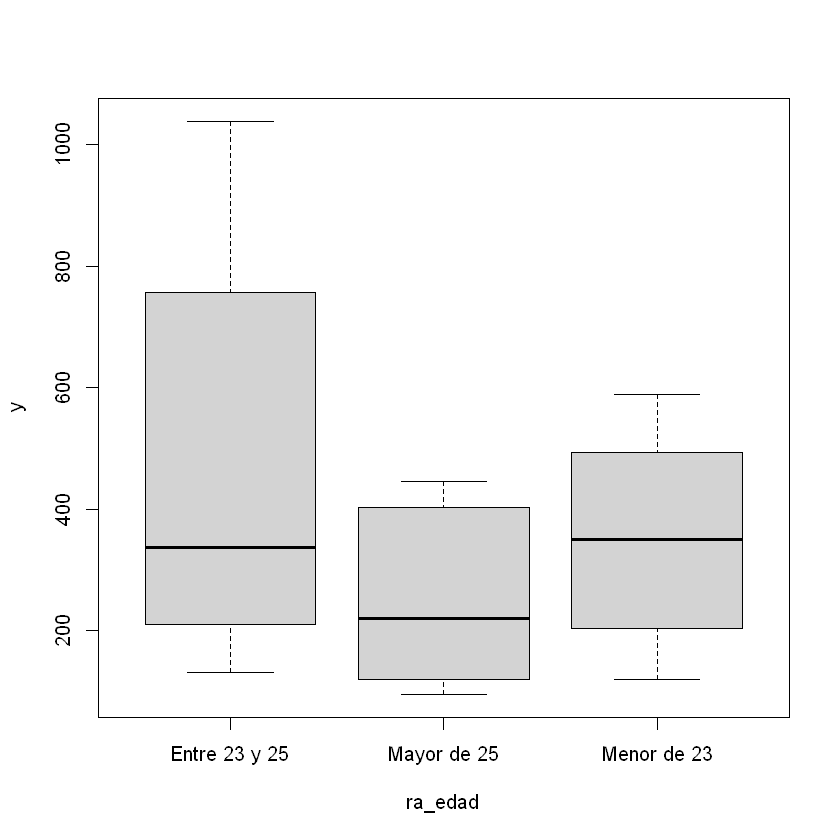

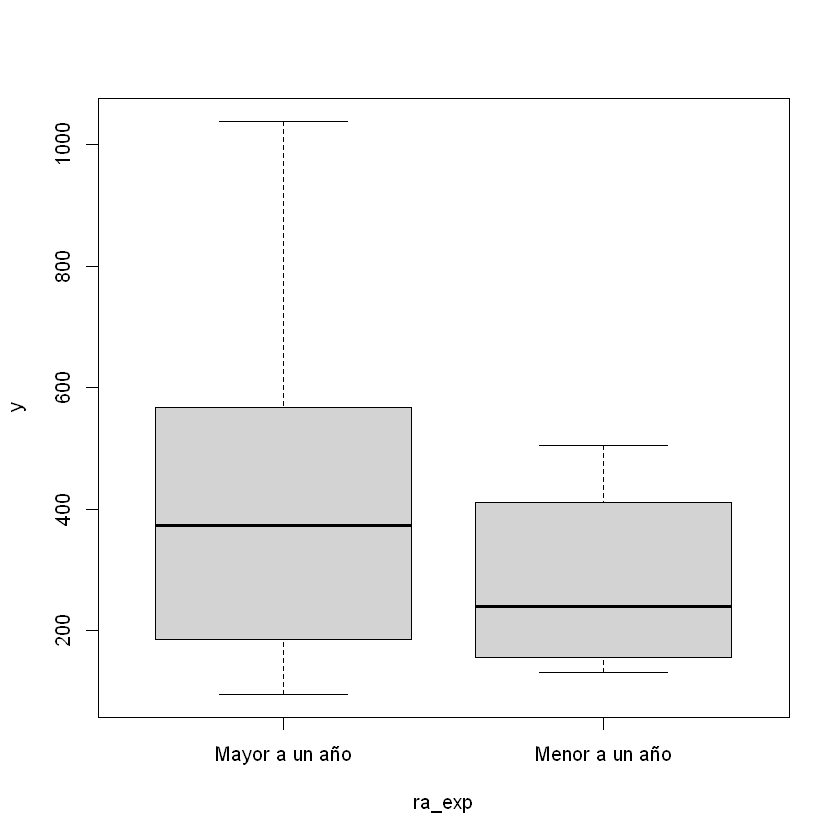

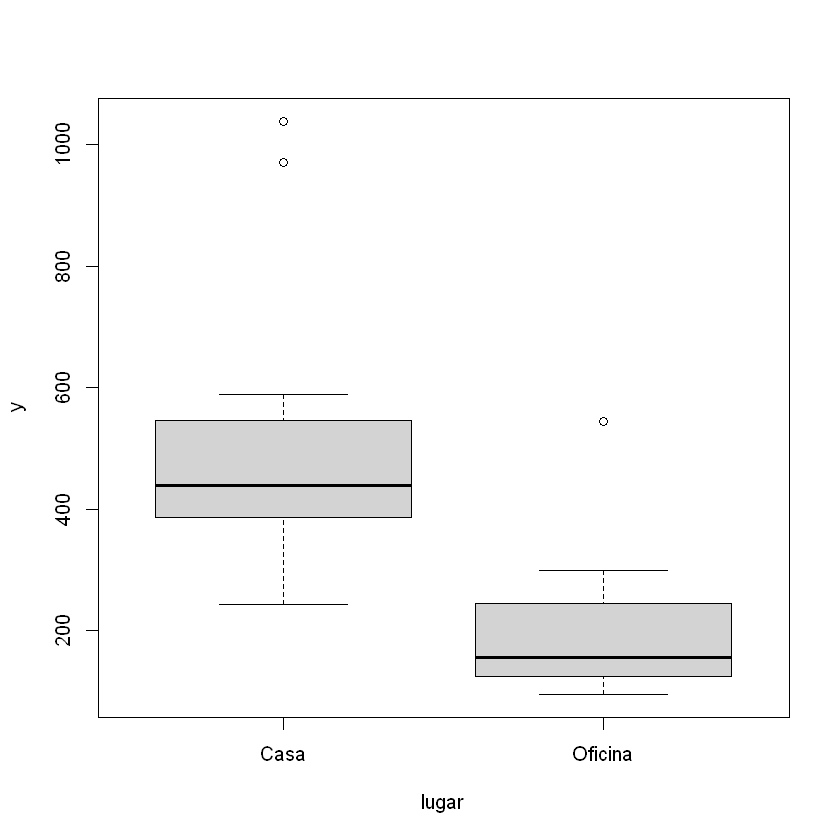

In [1]:
y=c(481,589,970,1038,446,300,299,120,544,253,95,103,504,400,422,243,433,374,238,171,131,178,141,136)
ra_edad=factor(rep(c("Menor de 23","Entre 23 y 25","Mayor de 25"),4,each=2))
ra_exp=factor(rep(c("Mayor a un año","Menor a un año"),each=12))
lugar=factor(rep(c("Casa","Oficina"),2,each=6))
boxplot(y~ra_edad)
boxplot(y~ra_exp)
boxplot(y~lugar)

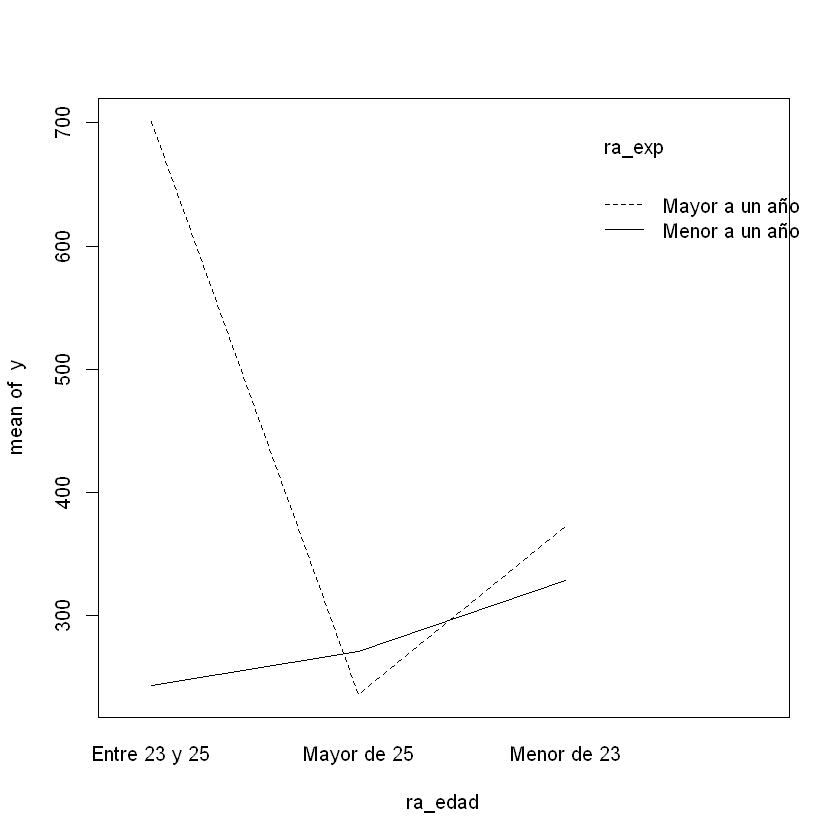

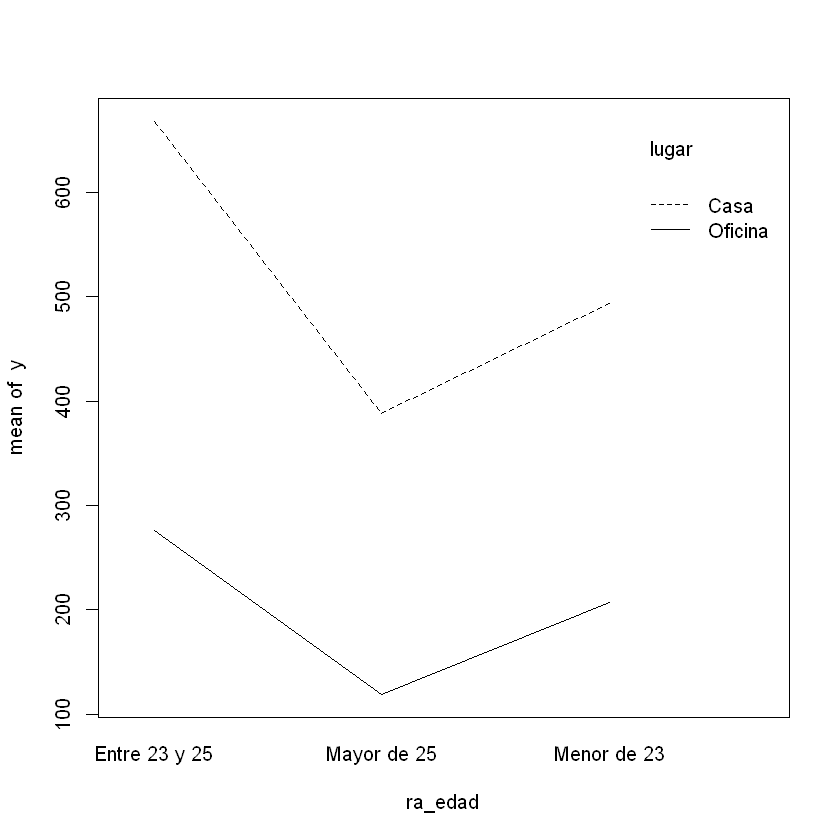

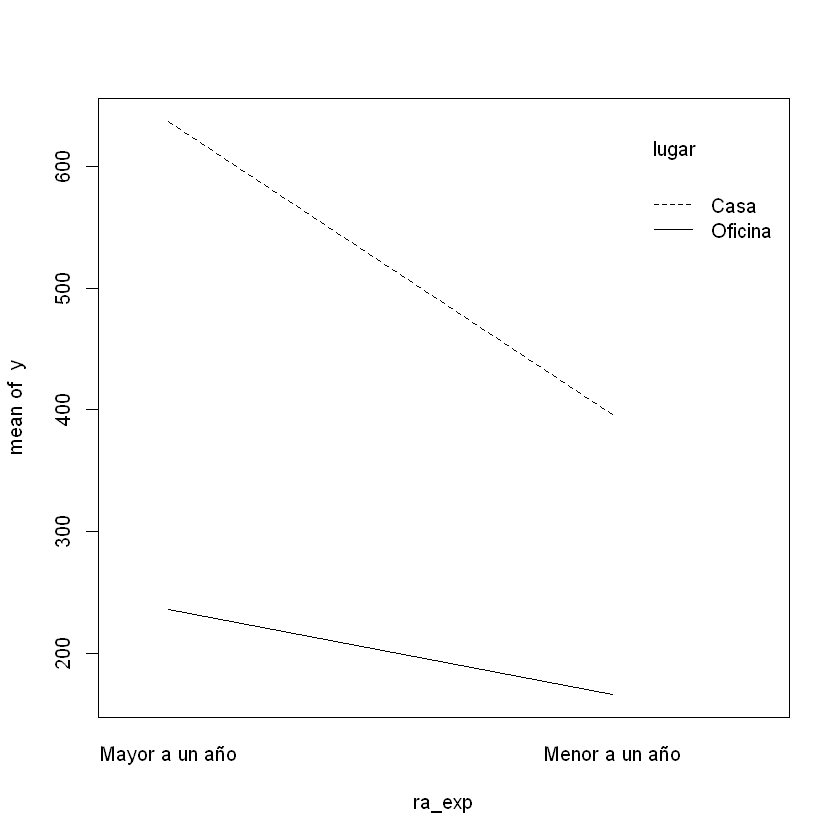

In [2]:
interaction.plot(ra_edad,ra_exp,y)
interaction.plot(ra_edad,lugar,y)
interaction.plot(ra_exp,lugar,y)

In [3]:
m=lm(y~ra_edad*ra_exp*lugar)
anova(m)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
ra_edad,2,192483.58,96241.792,11.134210,1.843839e-03
ra_exp,1,145237.04,145237.042,16.802469,1.474785e-03
lugar,1,598820.04,598820.042,69.277473,2.500514e-06
ra_edad:ra_exp,2,280155.08,140077.542,16.205567,3.891673e-04
ra_edad:lugar,2,17541.08,8770.542,1.014664,3.916214e-01
ra_exp:lugar,1,44118.38,44118.375,5.104053,4.327212e-02
ra_edad:ra_exp:lugar,2,50342.25,25171.125,2.912047,9.311996e-02
Residuals,12,103725.50,8643.792,NA,NA


In [4]:
install.packages("agricolae")
library(agricolae)

Installing package into 'C:/Users/MAKEL/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'agricolae' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\MAKEL\AppData\Local\Temp\RtmpYRpMMw\downloaded_packages


Warning message:
"package 'agricolae' was built under R version 4.3.2"



Study: m ~ "ra_edad"

HSD Test for y 

Mean Square Error:  8643.792 

ra_edad,  means

                    y      std r       se Min  Max    Q25   Q50    Q75
Entre 23 y 25 472.375 354.3932 8 32.87056 131 1038 226.75 337.5 650.50
Mayor de 25   253.500 151.2774 8 32.87056  95  446 127.75 220.5 388.75
Menor de 23   350.250 169.2772 8 32.87056 120  589 221.25 349.5 486.75

Alpha: 0.05 ; DF Error: 12 
Critical Value of Studentized Range: 3.772929 

Minimun Significant Difference: 124.0183 

Treatments with the same letter are not significantly different.

                    y groups
Entre 23 y 25 472.375      a
Menor de 23   350.250     ab
Mayor de 25   253.500      b


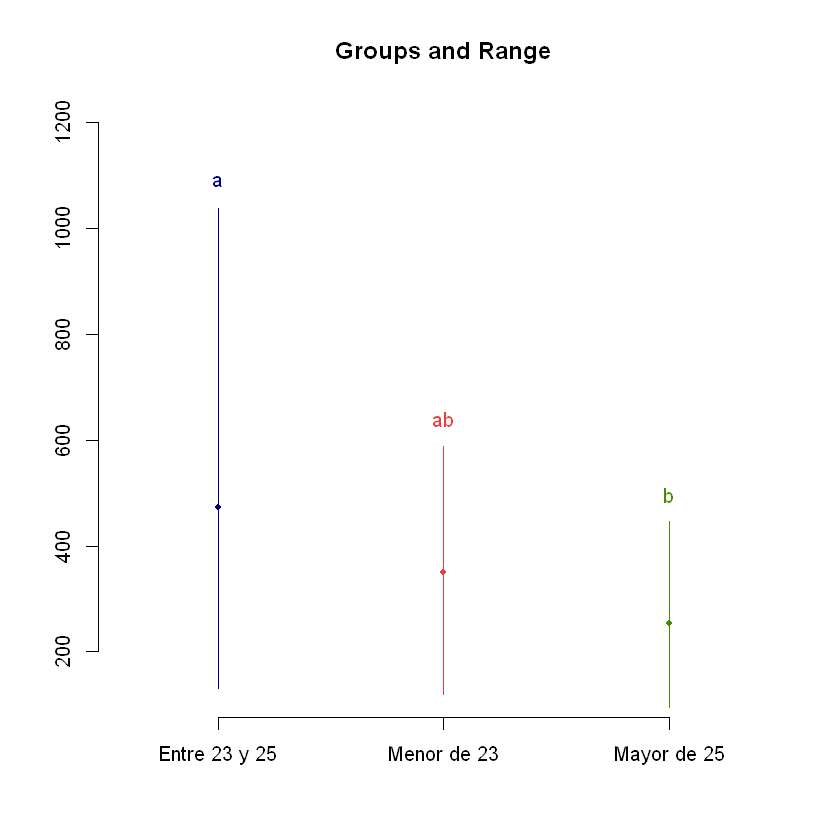

In [5]:
plot(HSD.test(m,"ra_edad",console=T))


Study: m ~ "ra_exp"

HSD Test for y 

Mean Square Error:  8643.792 

ra_exp,  means

                      y      std  r      se Min  Max    Q25   Q50    Q75
Mayor a un año 436.5000 313.7073 12 26.8387  95 1038 219.75 373.0 555.25
Menor a un año 280.9167 136.3988 12 26.8387 131  504 163.50 240.5 405.50

Alpha: 0.05 ; DF Error: 12 
Critical Value of Studentized Range: 3.081307 

Minimun Significant Difference: 82.69827 

Treatments with the same letter are not significantly different.

                      y groups
Mayor a un año 436.5000      a
Menor a un año 280.9167      b


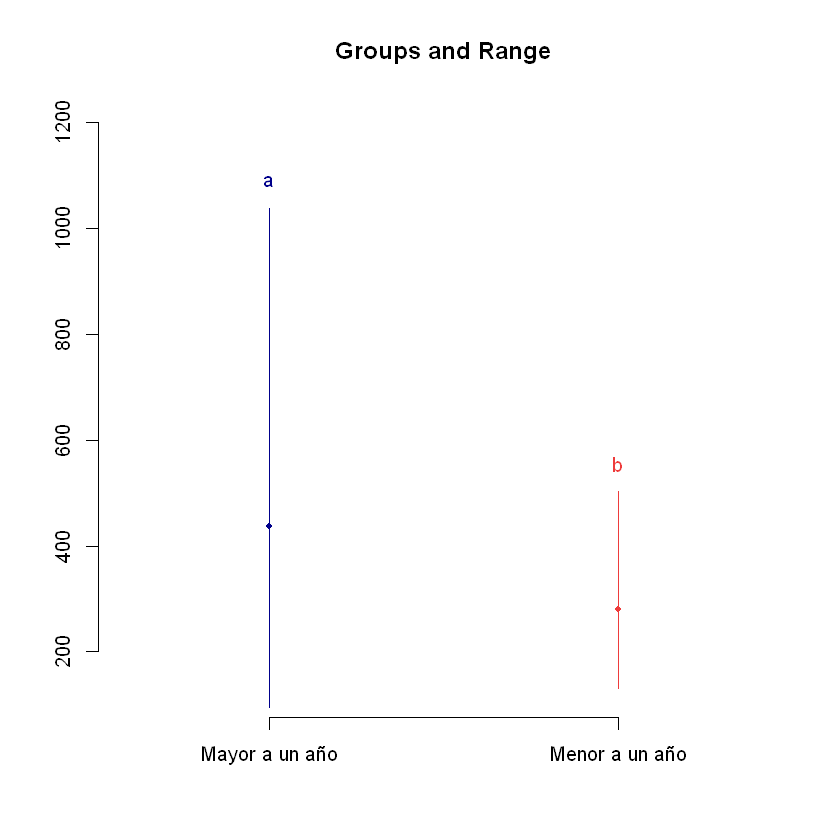

In [6]:
plot(HSD.test(m,"ra_exp",console=T))


Study: m ~ "lugar"

HSD Test for y 

Mean Square Error:  8643.792 

lugar,  means

               y     std  r      se Min  Max    Q25   Q50    Q75
Casa    516.6667 245.083 12 26.8387 243 1038 393.50 439.5 525.25
Oficina 200.7500 125.365 12 26.8387  95  544 128.25 156.0 241.75

Alpha: 0.05 ; DF Error: 12 
Critical Value of Studentized Range: 3.081307 

Minimun Significant Difference: 82.69827 

Treatments with the same letter are not significantly different.

               y groups
Casa    516.6667      a
Oficina 200.7500      b


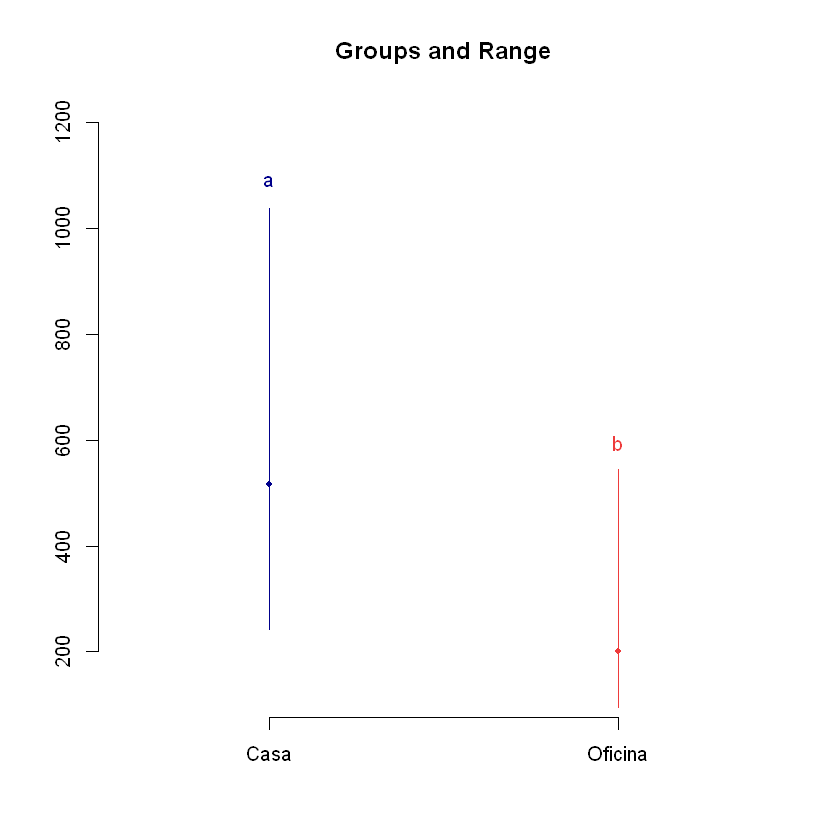

In [7]:
plot(HSD.test(m,"lugar",console=T))

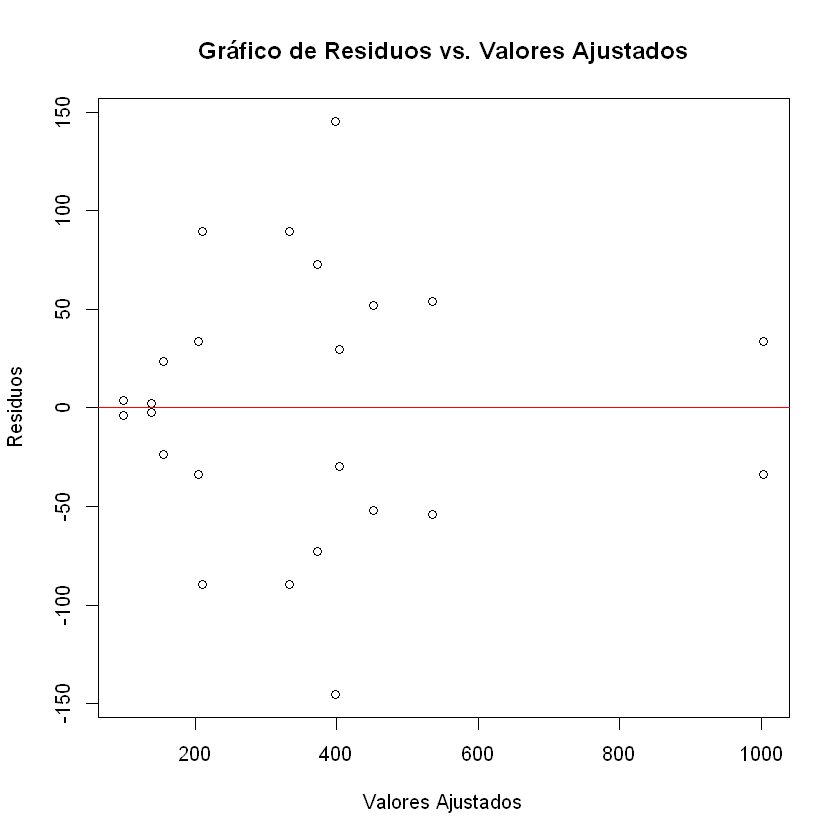

In [11]:
residuos = resid(m)
valores_ajustados = fitted(m)

plot(valores_ajustados, residuos, xlab = "Valores Ajustados", ylab = "Residuos", main = "Gráfico de Residuos vs. Valores Ajustados")
abline(h = 0, col = "red")  # Línea horizontal en cero

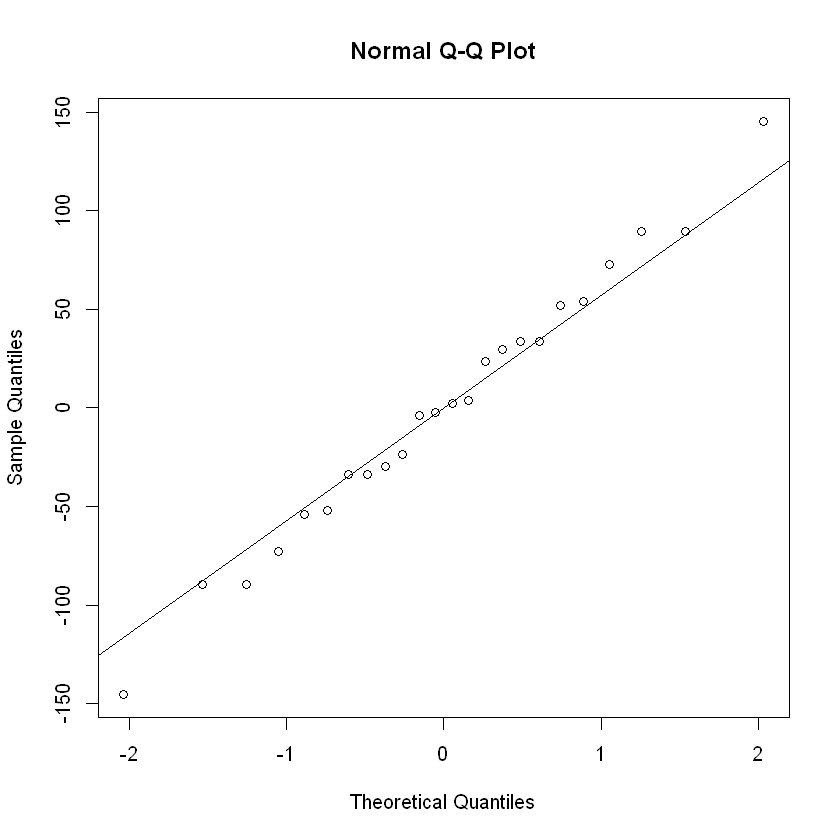

In [14]:
qqnorm(residuos)
qqline(residuos)

In [15]:
shapiro.test(residuos)


	Shapiro-Wilk normality test

data:  residuos
W = 0.99288, p-value = 0.9996


no se tiene evidencia suficiente para rechazar la hipótesis nula de que los residuos siguen una distribución normal. En otras palabras, los datos de los residuos no parecen desviarse significativamente de una distribución normal.